In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importando tabelas

jan25 = pd.read_excel('/Users/diogenes/Documents/UPA/Demanda 25-7-2025/janeiro25.xlsx')
fev25 = pd.read_excel('/Users/diogenes/Documents/UPA/Demanda 25-7-2025/fevereiro25.xlsx')
mar25 = pd.read_excel('/Users/diogenes/Documents/UPA/Demanda 25-7-2025/marco25.xlsx')
abr25 = pd.read_excel('/Users/diogenes/Documents/UPA/Demanda 25-7-2025/abril25.xlsx')
mai25 = pd.read_excel('/Users/diogenes/Documents/UPA/Demanda 25-7-2025/maio25.xlsx')
jun25 = pd.read_excel('/Users/diogenes/Documents/UPA/Demanda 25-7-2025/junho25.xlsx')
jul25 = pd.read_excel('/Users/diogenes/Documents/UPA/Demanda 25-7-2025/julho25.xlsx')
ago25 = pd.read_excel('/Users/diogenes/Documents/UPA/Demanda 25-7-2025/agosto25.xlsx')

df25 = pd.concat([jan25, fev25, mar25, abr25, mai25, jun25, jul25, ago25], ignore_index=True)
  

In [3]:
df25.shape

(91108, 49)

In [4]:
len(df25)
print(f'Número de atendimentos em 2025:{len(df25)}')

Número de atendimentos em 2025:91108


In [5]:
df25.columns

Index(['prontuario_id', 'prontuario_unico', 'paciente_sexo',
       'paciente_telefone', 'paciente_endereco_complemento',
       'paciente_data_nascimento', 'paciente_documento', 'paciente_cartao_sus',
       'paciente_uf', 'paciente_municipio', 'paciente_bairro',
       'paciente_numero_lote', 'paciente_endereco', 'paciente_cep',
       'paciente_mae', 'paciente_responsavel', 'paciente_cor_raca',
       'estabelecimento', 'queixa_principal', 'classificacao_paciente_id',
       'data_chegada', 'complemento_dados_clinicos', 'cid', 'exames_fisicos',
       'hipotese_diagnostica', 'queixa_principal_dados_clinicos',
       'antecedentes_dados_clinicos', 'data_fila', 'setor', 'verde', 'amarelo',
       'laranja', 'vermelho', 'azul', 'classificacao_nome', 'encerramento',
       'encerramento_id', 'profissional_atendimento', 'profissional_cpf',
       'profissional_conselho_uf', 'paciente_idade_ano', 'data_altera',
       'data_cadastro', 'resultados_exames', 'profissional_sigla_conselho',
  

In [6]:
df25.head(5).T

,0,1,2,3,4
prontuario_id,3977138,3977153,3977157,3977173,3977176
prontuario_unico,1705354,1705362,330453,332282,94908
paciente_sexo,F,F,M,M,F
paciente_telefone,8699255507,8694313188,- 86988666838,8699607875,86995103919 - 8699432620
paciente_endereco_complemento,NaN,NaN,NaN,NaN,NaN
paciente_data_nascimento,02/11/2023,25/12/1967,11/01/1999,28/08/2003,04/10/1993
paciente_documento,01083406353,35241144315,08127750310,NaN,06136020300
paciente_cartao_sus,708202131198548.0,704705776267138.0,898004836075582.0,898003962930304.0,705206481063276.0
paciente_uf,PI,PI,PI,PI,PI
paciente_municipio,TERESINA,TERESINA,TERESINA,TERESINA,TERESINA


# Filtrei colunas de interesse para análise

In [7]:
# Passo 1: Definir as colunas de interesse
colunas_interesse = [
    'prontuario_id', 
    'prontuario_unico', 
    'paciente_data_nascimento', 
    'queixa_principal',
    'classificacao_paciente_id',
    'data_chegada',
    'data_fila',
    'setor',
    'verde',
    'amarelo', 
    'laranja',
    'vermelho',
    'azul',
    'classificacao_nome',
    'encerramento',
    'encerramento_id',
    'profissional_atendimento',
    'data_cadastro',
    'profissional_codigo_conselho',
    'data_atendimento'
]

print("Colunas selecionadas:")
for i, coluna in enumerate(colunas_interesse, 1):
    print(f"{i}. {coluna}")

Colunas selecionadas:
1. prontuario_id
2. prontuario_unico
3. paciente_data_nascimento
4. queixa_principal
5. classificacao_paciente_id
6. data_chegada
7. data_fila
8. setor
9. verde
10. amarelo
11. laranja
12. vermelho
13. azul
14. classificacao_nome
15. encerramento
16. encerramento_id
17. profissional_atendimento
18. data_cadastro
19. profissional_codigo_conselho
20. data_atendimento


## Copiei dataframe apenas com colunas de interesse para não alterar o original

tive que tirar complemento, cid e hipotese pq tinham muitos nulos

In [8]:
# Passo 2: Criar o dataframe filtrado
# Usamos df25[lista_colunas] para pegar só as colunas que queremos
# .copy() faz uma cópia para não alterar o original

df_filtrado = df25[colunas_interesse].copy()

# Vamos ver o resultado
print(f"Antes: {df25.shape[1]} colunas")
print(f"Depois: {df_filtrado.shape[1]} colunas")
print(f"Mantivemos {len(colunas_interesse)} colunas importantes")

Antes: 49 colunas
Depois: 20 colunas
Mantivemos 20 colunas importantes


## Tipos de dados

In [9]:
# Passo 1: Ver os tipos de dados atuais
print("TIPOS DE DADOS ATUAIS:")
print(df_filtrado.dtypes)

TIPOS DE DADOS ATUAIS:
prontuario_id                     int64
prontuario_unico                  int64
paciente_data_nascimento         object
queixa_principal                 object
classificacao_paciente_id         int64
data_chegada                     object
data_fila                        object
setor                            object
verde                            object
amarelo                          object
laranja                          object
vermelho                         object
azul                             object
classificacao_nome               object
encerramento                     object
encerramento_id                 float64
profissional_atendimento         object
data_cadastro                    object
profissional_codigo_conselho      int64
data_atendimento                 object
dtype: object


In [10]:
# Passo 2: Converter IDs para string (texto)
# IDs não fazemos conta, então devem ser texto

print("Convertendo IDs para string...")
df_filtrado['prontuario_id'] = df_filtrado['prontuario_id'].astype(str)
df_filtrado['prontuario_unico'] = df_filtrado['prontuario_unico'].astype(str)
df_filtrado['classificacao_paciente_id'] = df_filtrado['classificacao_paciente_id'].astype(str)
df_filtrado['encerramento_id'] = df_filtrado['encerramento_id'].astype(str)
df_filtrado['profissional_codigo_conselho'] = df_filtrado['profissional_codigo_conselho'].astype(str)

print("IDs convertidos para string!")
df_filtrado.dtypes

Convertendo IDs para string...
IDs convertidos para string!


prontuario_id                   object
prontuario_unico                object
paciente_data_nascimento        object
queixa_principal                object
classificacao_paciente_id       object
data_chegada                    object
data_fila                       object
setor                           object
verde                           object
amarelo                         object
laranja                         object
vermelho                        object
azul                            object
classificacao_nome              object
encerramento                    object
encerramento_id                 object
profissional_atendimento        object
data_cadastro                   object
profissional_codigo_conselho    object
data_atendimento                object
dtype: object

In [11]:
# Passo 3: Converter datas - VERSÃO CORRIGIDA
# Vamos manter TODAS como datetime64 para poder fazer análises

print("Convertendo TODAS as datas para datetime64...")

# Todas as datas como datetime - formato brasileiro
df_filtrado['paciente_data_nascimento'] = pd.to_datetime(df_filtrado['paciente_data_nascimento'], dayfirst=True)
df_filtrado['data_chegada'] = pd.to_datetime(df_filtrado['data_chegada'], dayfirst=True)
df_filtrado['data_fila'] = pd.to_datetime(df_filtrado['data_fila'], dayfirst=True)
df_filtrado['data_cadastro'] = pd.to_datetime(df_filtrado['data_cadastro'], dayfirst=True)
df_filtrado['data_atendimento'] = pd.to_datetime(df_filtrado['data_atendimento'], dayfirst=True)

print("Conversão concluída!")

# Verificar se deu certo
print("\nTipos das colunas de data:")
colunas_data = ['paciente_data_nascimento', 'data_chegada', 'data_fila', 'data_cadastro', 'data_atendimento']
for coluna in colunas_data:
    print(f"{coluna}: {df_filtrado[coluna].dtype}")

Convertendo TODAS as datas para datetime64...
Conversão concluída!

Tipos das colunas de data:
paciente_data_nascimento: datetime64[ns]
data_chegada: datetime64[ns]
data_fila: datetime64[ns]
data_cadastro: datetime64[ns]
data_atendimento: datetime64[ns]


In [12]:
df_filtrado.head().T

,0,1,2,3,4
prontuario_id,3977138,3977153,3977157,3977173,3977176
prontuario_unico,1705354,1705362,330453,332282,94908
paciente_data_nascimento,2023-11-02 00:00:00,1967-12-25 00:00:00,1999-01-11 00:00:00,2003-08-28 00:00:00,1993-10-04 00:00:00
queixa_principal,MAL ESTAR EM CRIANCA,"DOR DE CABECA (CEFALEIA), TONTURA OU VERTIGEM",QUEIMADURA POR FOGO,MORDEDURAS E PICADAS,MAL ESTAR EM ADULTO
classificacao_paciente_id,6875649,6875668,6875672,6875694,6875697
data_chegada,2025-01-01 00:25:00,2025-01-01 00:58:00,2025-01-01 01:11:00,2025-01-01 01:25:00,2025-01-01 01:45:00
data_fila,2025-01-01 00:25:00,2025-01-01 00:58:00,2025-01-01 01:11:00,2025-01-01 01:25:00,2025-01-01 01:45:00
setor,CONSULTORIO PEDIATRICO,CONSULTORIO CLINICO,SALA DE SUTURA,CONSULTORIO CLINICO,CONSULTORIO CLINICO
verde,NaN,X,X,X,X
amarelo,X,NaN,NaN,NaN,NaN


# Iniciando análise descritiva

In [13]:
# ANÁLISE DE DEMANDA - Passo a passo

# Passo 1: Total de atendimentos (conceito: contar linhas)
total_atendimentos = len(df_filtrado)
print(f"Total de atendimentos: {total_atendimentos:,}")
print("   (Cada linha = 1 atendimento)")

# Passo 2: Descobrir período dos dados (conceito: min e max de datas)
data_minima = df_filtrado['data_chegada'].min()
data_maxima = df_filtrado['data_chegada'].max()

print(f"\nPeríodo analisado:")
print(f"   Início: {data_minima.strftime('%d/%m/%Y')}")
print(f"   Fim: {data_maxima.strftime('%d/%m/%Y')}")

# Passo 3: Calcular dias (conceito: diferença entre datas)
dias_totais = (data_maxima - data_minima).days + 1  # +1 inclui o primeiro dia
print(f"   Total: {dias_totais} dias")

# Passo 4: Média por dia (conceito: divisão simples)
media_por_dia = total_atendimentos / dias_totais
print(f"\nDEMANDA MÉDIA: {media_por_dia:.1f} pacientes/dia")
print("   (Isso é o que 'chega' na UPA por dia)")

Total de atendimentos: 91,108
   (Cada linha = 1 atendimento)

Período analisado:
   Início: 01/01/2025
   Fim: 29/08/2025
   Total: 241 dias

DEMANDA MÉDIA: 378.0 pacientes/dia
   (Isso é o que 'chega' na UPA por dia)


In [14]:
# FILTRO PARA CLÍNICA MÉDICA
df_filtrado['setor'].value_counts()

setor
CONSULTORIO CLINICO         61703
CONSULTORIO PEDIATRICO      18626
SALA DE SUTURA               5353
CONSULTORIO ODONTOLOGICO     2705
SALA DE MEDICACAO             293
SALA DE PROCEDIMENTO          191
SALA DE ESTABILIZACAO         136
OBSERVACAO                      6
CONSULTORIO ORTOPEDICO          4
CONSULTORIO COVID               3
SALA DE INALACAO                3
SALA VERMELHA                   2
SERVICO SOCIAL                  1
Name: count, dtype: int64

In [15]:
print("DIAGNÓSTICO DE VALORES NULOS:")
print(f"Valores nulos em 'setor': {df_filtrado['setor'].isna().sum()}")

DIAGNÓSTICO DE VALORES NULOS:
Valores nulos em 'setor': 2082


Claramente existem muitas opções (13) de setor para alocar, além de quase 2 mil valores nulos. Vou excluir os que claramente são cirúrgicos ou pediátrico, colocar o resto como clínica médica.

In [16]:
# ANÁLISE DE CLÍNICA MÉDICA - Lógica de Exclusão

# Passo 1: Verificar valores nulos primeiro
print("Verificando valores nulos em 'setor':")
nulos_setor = df_filtrado['setor'].isna().sum()
print(f"Valores nulos encontrados: {nulos_setor}")

# Passo 2: Tratar valores nulos (assumir clínica médica)
if nulos_setor > 0:
    print("Substituindo valores nulos por 'CONSULTORIO CLINICO'")
    df_filtrado['setor'] = df_filtrado['setor'].fillna('CONSULTORIO CLINICO')

# Passo 3: Definir setores que NÃO são clínica médica
setores_excluir = [
    'SALA DE SUTURA', 
    'CONSULTORIO PEDIATRICO', 
    'CONSULTORIO ODONTOLOGICO', 
    'CONSULTORIO ORTOPEDICO', 
    'SERVICO SOCIAL'
]

print(f"\nSetores excluídos da clínica médica: {setores_excluir}")

# Passo 4: Aplicar filtro de exclusão
df_clinica_medica = df_filtrado[~df_filtrado['setor'].isin(setores_excluir)].copy()

print(f"\nResultado:")
print(f"Total geral: {len(df_filtrado):,} atendimentos")
print(f"Clínica médica: {len(df_clinica_medica):,} atendimentos")
print(f"Percentual: {len(df_clinica_medica)/len(df_filtrado)*100:.1f}% do total")

Verificando valores nulos em 'setor':
Valores nulos encontrados: 2082
Substituindo valores nulos por 'CONSULTORIO CLINICO'

Setores excluídos da clínica médica: ['SALA DE SUTURA', 'CONSULTORIO PEDIATRICO', 'CONSULTORIO ODONTOLOGICO', 'CONSULTORIO ORTOPEDICO', 'SERVICO SOCIAL']

Resultado:
Total geral: 91,108 atendimentos
Clínica médica: 64,419 atendimentos
Percentual: 70.7% do total


### ANÁLISE DE CLÍNICA MÉDICA


In [17]:
# ANÁLISE DE CLÍNICA MÉDICA - Lógica de Exclusão

# Definir setores que NÃO são clínica médica
setores_excluir = [
    'SALA DE SUTURA',
    'CONSULTORIO PEDIATRICO',
    'CONSULTORIO ODONTOLOGICO',
    'CONSULTORIO ORTOPEDICO',
    'SERVICO SOCIAL'
]

print(f"\nSetores excluídos da clínica médica: {setores_excluir}")

# Passo 4: Aplicar filtro de exclusão
df_clinica_medica = df_filtrado[~df_filtrado['setor'].isin(setores_excluir)].copy()

print(f"\nResultado:")
print(f"Total geral: {len(df_filtrado):,} atendimentos")
print(f"Clínica médica: {len(df_clinica_medica):,} atendimentos")
print(f"Percentual: {len(df_clinica_medica)/len(df_filtrado)*100:.1f}% do total")



Setores excluídos da clínica médica: ['SALA DE SUTURA', 'CONSULTORIO PEDIATRICO', 'CONSULTORIO ODONTOLOGICO', 'CONSULTORIO ORTOPEDICO', 'SERVICO SOCIAL']

Resultado:
Total geral: 91,108 atendimentos
Clínica médica: 64,419 atendimentos
Percentual: 70.7% do total


In [18]:
# DEMANDA DE CLÍNICA MÉDICA

# Calcular demanda diária de clínica médica
data_minima = df_clinica_medica['data_chegada'].min()
data_maxima = df_clinica_medica['data_chegada'].max()
dias_periodo = (data_maxima - data_minima).days + 1

media_clinica_dia = len(df_clinica_medica) / dias_periodo

print("DEMANDA DE CLÍNICA MÉDICA:")
print(f"Período: {data_minima.strftime('%d/%m/%Y')} a {data_maxima.strftime('%d/%m/%Y')}")
print(f"Total de dias: {dias_periodo}")
print(f"Média por dia: {media_clinica_dia:.1f} pacientes/dia")

print("\nCOMPARAÇÃO GERAL vs CLÍNICA MÉDICA:")
media_geral_dia = len(df_filtrado) / dias_periodo
print(f"Demanda geral: {media_geral_dia:.1f} pacientes/dia")
print(f"Demanda clínica médica: {media_clinica_dia:.1f} pacientes/dia")
print(f"Clínica médica representa {media_clinica_dia/media_geral_dia*100:.1f}% da demanda total")

DEMANDA DE CLÍNICA MÉDICA:
Período: 01/01/2025 a 29/08/2025
Total de dias: 241
Média por dia: 267.3 pacientes/dia

COMPARAÇÃO GERAL vs CLÍNICA MÉDICA:
Demanda geral: 378.0 pacientes/dia
Demanda clínica médica: 267.3 pacientes/dia
Clínica médica representa 70.7% da demanda total


In [19]:
# TABELA DINÂMICA - Conceito básico com horários reais

print("CONCEITO DE TABELA DINÂMICA:")
print("É como 'resumir' dados grandes em informações úteis")
print("Exemplo: 64.000 atendimentos → quantos por hora do dia?")

# Passo 1: Extrair hora da chegada
print("\nPasso 1: Extrair hora da data_chegada")
df_clinica_medica['hora_chegada'] = df_clinica_medica['data_chegada'].dt.hour
print("Criamos nova coluna 'hora_chegada' (0 a 23)")

# Passo 2: Tabela dinâmica simples - contar por hora
print("\nPasso 2: TABELA DINÂMICA - Atendimentos por hora")
print("Conceito: 'Para cada hora, contar quantos atendimentos'")
atend_por_hora = df_clinica_medica['hora_chegada'].value_counts().sort_index()

print("\nPrimeiras 6 horas:")
for hora in range(6):
    qtd = atend_por_hora.get(hora, 0)
    print(f"  {hora:2d}h: {qtd:,} atendimentos")

print("\nHorário de pico:")
hora_pico = atend_por_hora.idxmax()
qtd_pico = atend_por_hora.max()
print(f"  {hora_pico}h: {qtd_pico:,} atendimentos (maior movimento)")

CONCEITO DE TABELA DINÂMICA:
É como 'resumir' dados grandes em informações úteis
Exemplo: 64.000 atendimentos → quantos por hora do dia?

Passo 1: Extrair hora da data_chegada
Criamos nova coluna 'hora_chegada' (0 a 23)

Passo 2: TABELA DINÂMICA - Atendimentos por hora
Conceito: 'Para cada hora, contar quantos atendimentos'

Primeiras 6 horas:
   0h: 840 atendimentos
   1h: 605 atendimentos
   2h: 425 atendimentos
   3h: 391 atendimentos
   4h: 335 atendimentos
   5h: 643 atendimentos

Horário de pico:
  9h: 5,103 atendimentos (maior movimento)


In [20]:
# TURNOS REAIS: Diurno (7-19h) e Noturno (19-7h)

print("TABELA DINÂMICA POR TURNOS:")
print("Diurno: 7h às 19h (12 horas)")  
print("Noturno: 19h às 7h (12 horas)")

# Criar coluna de turno
def definir_turno(hora):
    if 7 <= hora < 19:
        return 'Diurno'
    else:
        return 'Noturno'

# Aplicar função para cada linha (conceito: aplicar regra em massa)
df_clinica_medica['turno'] = df_clinica_medica['hora_chegada'].apply(definir_turno)

# Tabela dinâmica por turno
print("\nTABELA DINÂMICA: Atendimentos por turno")
atend_por_turno = df_clinica_medica['turno'].value_counts()

for turno, qtd in atend_por_turno.items():
    percentual = qtd / len(df_clinica_medica) * 100
    media_dia_turno = qtd / dias_periodo
    print(f"{turno}: {qtd:,} atendimentos ({percentual:.1f}%)")
    print(f"         = {media_dia_turno:.1f} pacientes/dia neste turno")

print(f"\nTotal verificação: {atend_por_turno.sum():,} atendimentos")

TABELA DINÂMICA POR TURNOS:
Diurno: 7h às 19h (12 horas)
Noturno: 19h às 7h (12 horas)

TABELA DINÂMICA: Atendimentos por turno
Diurno: 48,726 atendimentos (75.6%)
         = 202.2 pacientes/dia neste turno
Noturno: 15,693 atendimentos (24.4%)
         = 65.1 pacientes/dia neste turno

Total verificação: 64,419 atendimentos


In [21]:
# CAPACIDADE vs DEMANDA COM DADOS REAIS

# Dados fornecidos
clinicos_diurno = 5
clinicos_noturno = 4

print("ANÁLISE CAPACIDADE vs DEMANDA:")
print("=" * 40)

# Pegar dados da tabela dinâmica anterior
demanda_diurno = atend_por_turno['Diurno'] / dias_periodo
demanda_noturno = atend_por_turno['Noturno'] / dias_periodo

print("TURNO DIURNO (7h-19h):")
print(f"  Demanda: {demanda_diurno:.1f} pacientes/dia")
print(f"  Capacidade: {clinicos_diurno} clínicos")
print(f"  Carga por clínico: {demanda_diurno/clinicos_diurno:.1f} pacientes/clínico/turno")

print("\nTURNO NOTURNO (19h-7h):")
print(f"  Demanda: {demanda_noturno:.1f} pacientes/dia") 
print(f"  Capacidade: {clinicos_noturno} clínicos")
print(f"  Carga por clínico: {demanda_noturno/clinicos_noturno:.1f} pacientes/clínico/turno")

ANÁLISE CAPACIDADE vs DEMANDA:
TURNO DIURNO (7h-19h):
  Demanda: 202.2 pacientes/dia
  Capacidade: 5 clínicos
  Carga por clínico: 40.4 pacientes/clínico/turno

TURNO NOTURNO (19h-7h):
  Demanda: 65.1 pacientes/dia
  Capacidade: 4 clínicos
  Carga por clínico: 16.3 pacientes/clínico/turno


In [22]:
# EXPORTAR DADOS PARA CSV - Para mostrar para não programadores

print("EXPORTANDO DADOS PARA PLANILHAS:")
print("CSV = arquivo que abre no Excel, Google Sheets, etc.")

# 1. Dados principais de clínica médica
print("\n1. Exportando dataset completo de clínica médica...")
df_clinica_medica.to_csv('clinica_medica_completo.csv', index=False, encoding='utf-8')
print("   Arquivo salvo: clinica_medica_completo.csv")

# 2. Resumo por turno (tabela dinâmica simples)
print("\n2. Criando resumo por turno...")
resumo_turno = df_clinica_medica.groupby('turno').agg({
    'prontuario_id': 'count',           # conta atendimentos
    'classificacao_nome': 'first'       # só para ter mais uma coluna
}).rename(columns={'prontuario_id': 'total_atendimentos'})

resumo_turno.to_csv('resumo_por_turno.csv', encoding='utf-8')
print("   Arquivo salvo: resumo_por_turno.csv")

# 3. Atendimentos por hora (para gráficos)
print("\n3. Criando planilha de atendimentos por hora...")
atend_por_hora_df = atend_por_hora.reset_index()
atend_por_hora_df.columns = ['hora', 'atendimentos']
atend_por_hora_df.to_csv('atendimentos_por_hora.csv', index=False, encoding='utf-8')
print("   Arquivo salvo: atendimentos_por_hora.csv")

print("\nARQUIVOS CRIADOS:")
print("- clinica_medica_completo.csv (dados detalhados)")
print("- resumo_por_turno.csv (resumo para gestão)")  
print("- atendimentos_por_hora.csv (para gráficos)")
print("\nTodos podem ser abertos no Excel!")

EXPORTANDO DADOS PARA PLANILHAS:
CSV = arquivo que abre no Excel, Google Sheets, etc.

1. Exportando dataset completo de clínica médica...
   Arquivo salvo: clinica_medica_completo.csv

2. Criando resumo por turno...
   Arquivo salvo: resumo_por_turno.csv

3. Criando planilha de atendimentos por hora...
   Arquivo salvo: atendimentos_por_hora.csv

ARQUIVOS CRIADOS:
- clinica_medica_completo.csv (dados detalhados)
- resumo_por_turno.csv (resumo para gestão)
- atendimentos_por_hora.csv (para gráficos)

Todos podem ser abertos no Excel!


In [23]:
# RELATÓRIO EXECUTIVO PARA O CHEFE

print("CRIANDO RELATÓRIO EXECUTIVO:")
print("Resumo dos principais números para apresentar")

# Calcular métricas principais
total_clinica = len(df_clinica_medica)
periodo_dias = dias_periodo
media_dia = total_clinica / periodo_dias
demanda_diurno = atend_por_turno['Diurno'] / periodo_dias
demanda_noturno = atend_por_turno['Noturno'] / periodo_dias

# Criar relatório estruturado
relatorio = {
    'Métrica': [
        'Período analisado',
        'Total de atendimentos clínica médica', 
        'Média de atendimentos por dia',
        'Demanda turno diurno (7h-19h)',
        'Demanda turno noturno (19h-7h)',
        'Clínicos disponíveis diurno',
        'Clínicos disponíveis noturno',
        'Carga por clínico diurno',
        'Carga por clínico noturno',
        'Percentual diurno vs total',
        'Percentual noturno vs total'
    ],
    'Valor': [
        f'{periodo_dias} dias',
        f'{total_clinica:,}',
        f'{media_dia:.1f}',
        f'{demanda_diurno:.1f}',
        f'{demanda_noturno:.1f}',
        f'{clinicos_diurno}',
        f'{clinicos_noturno}',
        f'{demanda_diurno/clinicos_diurno:.1f} pac/clínico/turno',
        f'{demanda_noturno/clinicos_noturno:.1f} pac/clínico/turno',
        f'{atend_por_turno["Diurno"]/total_clinica*100:.1f}%',
        f'{atend_por_turno["Noturno"]/total_clinica*100:.1f}%'
    ]
}

import pandas as pd
df_relatorio = pd.DataFrame(relatorio)
df_relatorio.to_csv('relatorio_executivo_clinica_medica.csv', index=False, encoding='utf-8')

print("Arquivo salvo: relatorio_executivo_clinica_medica.csv")
print("\nEste arquivo está pronto para apresentar ao seu chefe!")

CRIANDO RELATÓRIO EXECUTIVO:
Resumo dos principais números para apresentar
Arquivo salvo: relatorio_executivo_clinica_medica.csv

Este arquivo está pronto para apresentar ao seu chefe!


In [24]:
# ANÁLISE POR GRAVIDADE - Classificação Manchester

print("ANALISANDO CLÍNICA MÉDICA POR GRAVIDADE:")

# Primeiro, ver quantos temos de cada cor
print("\nContagem por classificação de cor:")
print(f"Vermelho: {(df_clinica_medica['vermelho'] == 'X').sum():,}")
print(f"Laranja: {(df_clinica_medica['laranja'] == 'X').sum():,}")  
print(f"Amarelo: {(df_clinica_medica['amarelo'] == 'X').sum():,}")
print(f"Verde: {(df_clinica_medica['verde'] == 'X').sum():,}")
print(f"Azul: {(df_clinica_medica['azul'] == 'X').sum():,}")

# Verificar se há casos sem classificação
sem_classificacao = df_clinica_medica[
    (df_clinica_medica['vermelho'] != 'X') & 
    (df_clinica_medica['laranja'] != 'X') & 
    (df_clinica_medica['amarelo'] != 'X') & 
    (df_clinica_medica['verde'] != 'X') & 
    (df_clinica_medica['azul'] != 'X')
]
print(f"Sem classificação: {len(sem_classificacao):,}")

print(f"\nTotal verificação: {len(df_clinica_medica):,} atendimentos")

# Ver exemplos de cada tipo
print("\nExemplos por gravidade:")
for cor in ['vermelho', 'laranja', 'amarelo', 'verde', 'azul']:
    casos = df_clinica_medica[df_clinica_medica[cor] == 'X']
    if len(casos) > 0:
        print(f"{cor.capitalize()}: {len(casos)} casos")
        # Mostrar algumas queixas principais
        queixas = casos['queixa_principal'].value_counts().head(3)
        for queixa, qtd in queixas.items():
            print(f"  - {queixa}: {qtd} casos")

ANALISANDO CLÍNICA MÉDICA POR GRAVIDADE:

Contagem por classificação de cor:
Vermelho: 143
Laranja: 2,124
Amarelo: 12,690
Verde: 46,096
Azul: 2,827
Sem classificação: 539

Total verificação: 64,419 atendimentos

Exemplos por gravidade:
Vermelho: 143 casos
  - MAL ESTAR EM ADULTO: 39 casos
  - OUTRAS QUEIXAS: 31 casos
  - RELATO DE CONVULSAO: 14 casos
Laranja: 2124 casos
  - MAL ESTAR EM ADULTO: 471 casos
  - DOR DE CABECA (CEFALEIA), TONTURA OU VERTIGEM: 187 casos
  - OUTRAS QUEIXAS: 147 casos
Amarelo: 12690 casos
  - MAL ESTAR EM ADULTO: 1898 casos
  - DOR DE CABECA (CEFALEIA), TONTURA OU VERTIGEM: 1460 casos
  - FEBRE / SINAIS DE INFECCAO: 860 casos
Verde: 46096 casos
  - DOR DE CABECA (CEFALEIA), TONTURA OU VERTIGEM: 4573 casos
  - DIARREIA E/OU VOMITOS E/OU NAUSEAS: 4060 casos
  - MAL ESTAR EM ADULTO: 4058 casos
Azul: 2827 casos
  - MEDICACAO EXTERNA: 460 casos
  - MOSTRAR RESULTADOS EXAMES: 258 casos
  - OUTRAS QUEIXAS: 207 casos


Preparando dados para gráfico...
Vermelho - Emergência: 143 casos
Laranja - Urgente: 2,124 casos
Amarelo - Pouco Urgente: 12,690 casos
Verde - Não Urgente: 46,096 casos
Azul - Não Urgente: 2,827 casos


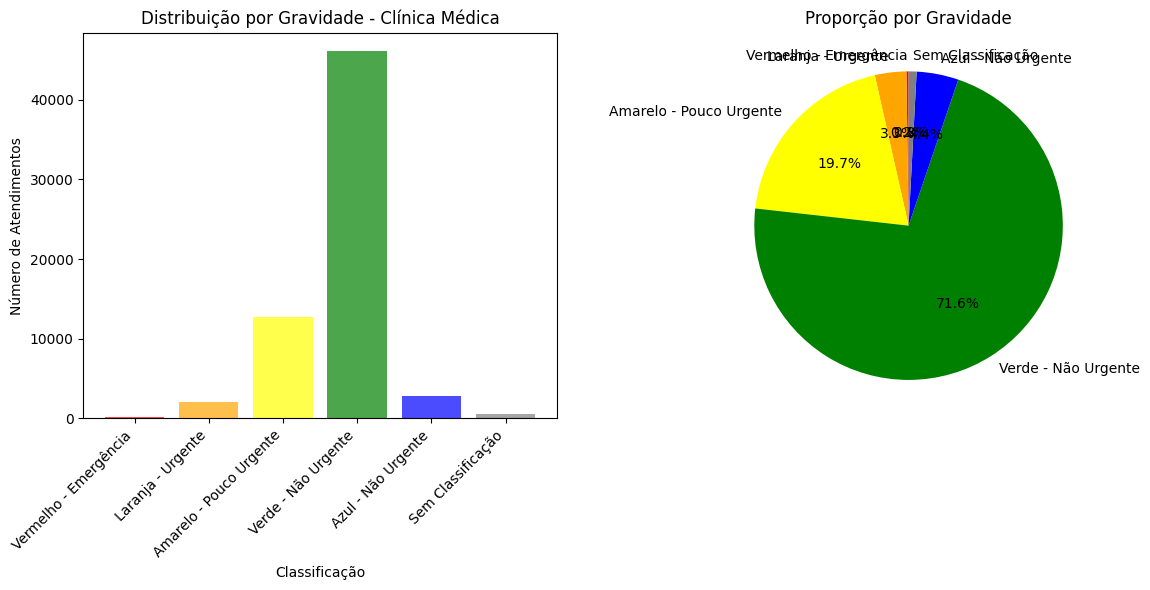


Total representado: 64,419 atendimentos


In [25]:
# GRÁFICO DE DISTRIBUIÇÃO POR GRAVIDADE

# Criar dados para o gráfico
gravidades = []
quantidades = []
cores_grafico = []

cores_dict = {
    'vermelho': ['red', 'Vermelho - Emergência'],
    'laranja': ['orange', 'Laranja - Urgente'], 
    'amarelo': ['yellow', 'Amarelo - Pouco Urgente'],
    'verde': ['green', 'Verde - Não Urgente'],
    'azul': ['blue', 'Azul - Não Urgente']
}

print("Preparando dados para gráfico...")
for cor, (cor_graf, nome_completo) in cores_dict.items():
    qtd = (df_clinica_medica[cor] == 'X').sum()
    if qtd > 0:
        gravidades.append(nome_completo)
        quantidades.append(qtd)
        cores_grafico.append(cor_graf)
        print(f"{nome_completo}: {qtd:,} casos")

# Adicionar casos sem classificação se existirem
if len(sem_classificacao) > 0:
    gravidades.append('Sem Classificação')
    quantidades.append(len(sem_classificacao))
    cores_grafico.append('gray')

# Criar gráfico
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))

# Gráfico de barras
plt.subplot(1, 2, 1)
plt.bar(gravidades, quantidades, color=cores_grafico, alpha=0.7)
plt.title('Distribuição por Gravidade - Clínica Médica')
plt.xlabel('Classificação')
plt.ylabel('Número de Atendimentos')
plt.xticks(rotation=45, ha='right')

# Gráfico de pizza
plt.subplot(1, 2, 2)
plt.pie(quantidades, labels=gravidades, colors=cores_grafico, autopct='%1.1f%%', startangle=90)
plt.title('Proporção por Gravidade')

plt.tight_layout()
plt.show()

print(f"\nTotal representado: {sum(quantidades):,} atendimentos")

In [26]:
# DEMANDA DOS CLÍNICOS GERAIS (excluindo emergência)

print("NOVA DISTRIBUIÇÃO DE MÉDICOS:")
print("1 médico de emergência: atende APENAS vermelhos + laranjas")
print("Clínicos gerais: atendem amarelos + verdes + azuis + sem classificação")
print()

# Separar casos críticos (vermelho + laranja) dos demais
casos_criticos = df_clinica_medica[
    (df_clinica_medica['vermelho'] == 'X') | 
    (df_clinica_medica['laranja'] == 'X')
]

casos_gerais = df_clinica_medica[
    (df_clinica_medica['amarelo'] == 'X') | 
    (df_clinica_medica['verde'] == 'X') | 
    (df_clinica_medica['azul'] == 'X') |
    ((df_clinica_medica['vermelho'] != 'X') & 
     (df_clinica_medica['laranja'] != 'X') & 
     (df_clinica_medica['amarelo'] != 'X') & 
     (df_clinica_medica['verde'] != 'X') & 
     (df_clinica_medica['azul'] != 'X'))  # sem classificação
]

print("DIVISÃO DOS CASOS:")
print(f"Casos críticos (vermelho + laranja): {len(casos_criticos):,}")
print(f"Casos gerais (demais): {len(casos_gerais):,}")
print(f"Total: {len(casos_criticos) + len(casos_gerais):,}")
print(f"Conferência: {len(df_clinica_medica):,} (deve ser igual)")

# Demanda diária
demanda_criticos_dia = len(casos_criticos) / dias_periodo
demanda_gerais_dia = len(casos_gerais) / dias_periodo

print(f"\nDEMANDA DIÁRIA:")
print(f"Médico emergência: {demanda_criticos_dia:.1f} pacientes críticos/dia")
print(f"Clínicos gerais: {demanda_gerais_dia:.1f} pacientes gerais/dia")

NOVA DISTRIBUIÇÃO DE MÉDICOS:
1 médico de emergência: atende APENAS vermelhos + laranjas
Clínicos gerais: atendem amarelos + verdes + azuis + sem classificação

DIVISÃO DOS CASOS:
Casos críticos (vermelho + laranja): 2,267
Casos gerais (demais): 62,152
Total: 64,419
Conferência: 64,419 (deve ser igual)

DEMANDA DIÁRIA:
Médico emergência: 9.4 pacientes críticos/dia
Clínicos gerais: 257.9 pacientes gerais/dia


In [27]:
# ANÁLISE POR TURNO DOS CLÍNICOS GERAIS

print("DEMANDA DOS CLÍNICOS GERAIS POR TURNO:")
print("Diurno: 4 clínicos gerais (excluindo 1 da emergência)")
print("Noturno: 3 clínicos gerais (excluindo 1 da emergência)")
print()

# Adicionar coluna turno aos casos gerais se não existir
casos_gerais['hora_chegada'] = casos_gerais['data_chegada'].dt.hour
casos_gerais['turno'] = casos_gerais['hora_chegada'].apply(lambda h: 'Diurno' if 7 <= h < 19 else 'Noturno')

# Demanda por turno para clínicos gerais
demanda_gerais_por_turno = casos_gerais['turno'].value_counts()

demanda_gerais_diurno = demanda_gerais_por_turno['Diurno'] / dias_periodo  
demanda_gerais_noturno = demanda_gerais_por_turno['Noturno'] / dias_periodo

# Nova capacidade
clinicos_gerais_diurno = 4  # 5 - 1 emergência
clinicos_gerais_noturno = 3  # 4 - 1 emergência

print("RESULTADOS:")
print(f"Turno DIURNO (7h-19h):")
print(f"  Demanda casos gerais: {demanda_gerais_diurno:.1f} pacientes/dia")
print(f"  Clínicos gerais disponíveis: {clinicos_gerais_diurno}")
print(f"  Carga por clínico: {demanda_gerais_diurno/clinicos_gerais_diurno:.1f} pacientes/clínico/turno")

print(f"\nTurno NOTURNO (19h-7h):")
print(f"  Demanda casos gerais: {demanda_gerais_noturno:.1f} pacientes/dia")
print(f"  Clínicos gerais disponíveis: {clinicos_gerais_noturno}")
print(f"  Carga por clínico: {demanda_gerais_noturno/clinicos_gerais_noturno:.1f} pacientes/clínico/turno")

print(f"\nCOMPARAÇÃO:")
carga_diurno = demanda_gerais_diurno/clinicos_gerais_diurno
carga_noturno = demanda_gerais_noturno/clinicos_gerais_noturno

if carga_diurno > carga_noturno:
    diferenca = carga_diurno - carga_noturno
    print(f"DIURNO tem carga {diferenca:.1f} pacientes/clínico MAIOR que noturno")
else:
    diferenca = carga_noturno - carga_diurno  
    print(f"NOTURNO tem carga {diferenca:.1f} pacientes/clínico MAIOR que diurno")

DEMANDA DOS CLÍNICOS GERAIS POR TURNO:
Diurno: 4 clínicos gerais (excluindo 1 da emergência)
Noturno: 3 clínicos gerais (excluindo 1 da emergência)

RESULTADOS:
Turno DIURNO (7h-19h):
  Demanda casos gerais: 196.1 pacientes/dia
  Clínicos gerais disponíveis: 4
  Carga por clínico: 49.0 pacientes/clínico/turno

Turno NOTURNO (19h-7h):
  Demanda casos gerais: 61.8 pacientes/dia
  Clínicos gerais disponíveis: 3
  Carga por clínico: 20.6 pacientes/clínico/turno

COMPARAÇÃO:
DIURNO tem carga 28.4 pacientes/clínico MAIOR que noturno


/var/folders/nv/8pjgnnrj1jj6g101p1xf8r1c0000gn/T/ipykernel_70882/4105351306.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  casos_gerais['hora_chegada'] = casos_gerais['data_chegada'].dt.hour
/var/folders/nv/8pjgnnrj1jj6g101p1xf8r1c0000gn/T/ipykernel_70882/4105351306.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  casos_gerais['turno'] = casos_gerais['hora_chegada'].apply(lambda h: 'Diurno' if 7 <= h < 19 else 'Noturno')


In [37]:
# SIMULAÇÃO: Redução de 1 médico no turno diurno

print("RESUMO DA ANÁLISE REALIZADA:")
print(f"Total de atendimentos analisados: {len(df_filtrado):,}")
print(f"Clínica médica: {len(df_clinica_medica):,} ({len(df_clinica_medica)/len(df_filtrado)*100:.1f}%)")
print(f"Turno diurno (7h-19h): {len(casos_gerais[casos_gerais['turno'] == 'Diurno']):,} atendimentos")
print(f"Turno noturno (19h-7h): {len(casos_gerais[casos_gerais['turno'] == 'Noturno']):,} atendimentos")
print(f"Período analisado: {dias_periodo} dias")
print()

print("SIMULAÇÃO: Reduzir 1 clínico do turno diurno")
print("=" * 50)

# Cenário atual
clinicos_diurno_atual = 4
clinicos_noturno_atual = 3
carga_diurno_atual = demanda_gerais_diurno / clinicos_diurno_atual
carga_noturno_atual = demanda_gerais_noturno / clinicos_noturno_atual

# Cenário proposto
clinicos_diurno_novo = 3
clinicos_noturno_novo = 3
carga_diurno_nova = demanda_gerais_diurno / clinicos_diurno_novo
carga_noturno_nova = demanda_gerais_noturno / clinicos_noturno_novo

print("CENÁRIO ATUAL:")
print(f"Diurno: {demanda_gerais_diurno:.1f} pacientes ÷ {clinicos_diurno_atual} clínicos = {carga_diurno_atual:.1f} pacientes/médico/turno")
print(f"Noturno: {demanda_gerais_noturno:.1f} pacientes ÷ {clinicos_noturno_atual} clínicos = {carga_noturno_atual:.1f} pacientes/médico/turno")

print("\nCENÁRIO PROPOSTO (3 clínicos diurnos):")
print(f"Diurno: {demanda_gerais_diurno:.1f} pacientes ÷ {clinicos_diurno_novo} clínicos = {carga_diurno_nova:.1f} pacientes/médico/turno")
print(f"Noturno: {demanda_gerais_noturno:.1f} pacientes ÷ {clinicos_noturno_novo} clínicos = {carga_noturno_nova:.1f} pacientes/médico/turno")

print("\nIMPACTO:")
aumento_carga = carga_diurno_nova - carga_diurno_atual
percentual_aumento = (aumento_carga/carga_diurno_atual)*100

print(f"Sobrecarga adicional no diurno: +{aumento_carga:.1f} pacientes por médico")
print(f"Aumento percentual da sobrecarga de trabalho: +{percentual_aumento:.1f}%")

diferenca_atual = abs(carga_diurno_atual - carga_noturno_atual)
diferenca_nova = abs(carga_diurno_nova - carga_noturno_nova)
variacao_diferenca = diferenca_nova - diferenca_atual

print(f"\nDiferença entre turnos:")
print(f"Cenário atual: {diferenca_atual:.1f} pacientes/clínico")
print(f"Cenário simulado: {diferenca_nova:.1f} pacientes/clínico")
print(f"Variação: +{variacao_diferenca:.1f} (pacientes a mais para cada clínico por turno)")

print("\nOBSERVAÇÕES IMPORTANTES:")
print("1. Taxa de ocupação real: Clínicos não atendem ininterruptamente durante 12h")
print("2. Tempo produtivo estimado: 80% do turno (pausas, escrever no prontuário, refeinções, pacientes mais complexos)")
print("3. Picos de demanda: é sempre diurno")

print("\nCONCLUSÃO:")
print(f"A redução proposta resultaria em:")
print(f"• Sobrecarga de {aumento_carga:.1f} pacientes adicionais por clínico no turno diurno")
print(f"• Aumento de {percentual_aumento:.1f}% na carga de trabalho diurna")  
print(f"• Maior disparidade entre os plantões ({variacao_diferenca:.1f} pacientes a mais/clínico)")
print(f"• Potencial comprometimento da qualidade assistencial no horário de maior movimento")

RESUMO DA ANÁLISE REALIZADA:
Total de atendimentos analisados: 91,108
Clínica médica: 64,419 (70.7%)
Turno diurno (7h-19h): 47,268 atendimentos
Turno noturno (19h-7h): 14,884 atendimentos
Período analisado: 241 dias

SIMULAÇÃO: Reduzir 1 clínico do turno diurno
CENÁRIO ATUAL:
Diurno: 196.1 pacientes ÷ 4 clínicos = 49.0 pacientes/médico/turno
Noturno: 61.8 pacientes ÷ 3 clínicos = 20.6 pacientes/médico/turno

CENÁRIO PROPOSTO (3 clínicos diurnos):
Diurno: 196.1 pacientes ÷ 3 clínicos = 65.4 pacientes/médico/turno
Noturno: 61.8 pacientes ÷ 3 clínicos = 20.6 pacientes/médico/turno

IMPACTO:
Sobrecarga adicional no diurno: +16.3 pacientes por médico
Aumento percentual da sobrecarga de trabalho: +33.3%

Diferença entre turnos:
Cenário atual: 28.4 pacientes/clínico
Cenário simulado: 44.8 pacientes/clínico
Variação: +16.3 (pacientes a mais para cada clínico por turno)

OBSERVAÇÕES IMPORTANTES:
1. Taxa de ocupação real: Clínicos não atendem ininterruptamente durante 12h
2. Tempo produtivo esti

In [29]:
# ANÁLISE POR DIA DA SEMANA - Variabilidade da Demanda

print("DEMANDA POR DIA DA SEMANA:")
print("Identificar padrões de variação semanal")
print()

# Extrair dia da semana da data de chegada
df_clinica_medica['dia_semana'] = df_clinica_medica['data_chegada'].dt.day_name()

# Traduzir para português
traducao_dias = {
    'Monday': 'Segunda-feira',
    'Tuesday': 'Terça-feira', 
    'Wednesday': 'Quarta-feira',
    'Thursday': 'Quinta-feira',
    'Friday': 'Sexta-feira',
    'Saturday': 'Sábado',
    'Sunday': 'Domingo'
}

df_clinica_medica['dia_semana_pt'] = df_clinica_medica['dia_semana'].map(traducao_dias)

# Contar atendimentos por dia da semana
atend_por_dia = df_clinica_medica['dia_semana_pt'].value_counts()

# Ordenar pelos dias da semana
ordem_dias = ['Segunda-feira', 'Terça-feira', 'Quarta-feira', 'Quinta-feira', 'Sexta-feira', 'Sábado', 'Domingo']
atend_por_dia_ordenado = atend_por_dia.reindex(ordem_dias)

print("Total de atendimentos por dia:")
total_geral = len(df_clinica_medica)
semanas_aproximadas = dias_periodo // 7 + 1
for dia, qtd in atend_por_dia_ordenado.items():
    percentual = qtd / total_geral * 100
    media_diaria = qtd / semanas_aproximadas
    print(f"{dia:15s}: {qtd:6,} atendimentos ({percentual:5.1f}%) - média ~{media_diaria:.0f}/dia")

# Identificar variabilidade
dia_maior = atend_por_dia_ordenado.idxmax()
dia_menor = atend_por_dia_ordenado.idxmin()
maior_qtd = atend_por_dia_ordenado.max()
menor_qtd = atend_por_dia_ordenado.min()
variacao = ((maior_qtd - menor_qtd) / menor_qtd) * 100

print(f"\nVariabilidade semanal:")
print(f"Maior movimento: {dia_maior} ({maior_qtd:,} atendimentos)")
print(f"Menor movimento: {dia_menor} ({menor_qtd:,} atendimentos)")
print(f"Variação: {variacao:.1f}% entre o dia de maior e menor movimento")

print(f"\nImplicações para dimensionamento:")
print(f"• Diferença de {maior_qtd - menor_qtd:,} atendimentos entre pico e vale")
print(f"• Necessidade de flexibilidade na escala de profissionais")
print(f"• Possível ajuste de plantões conforme demanda semanal")

DEMANDA POR DIA DA SEMANA:
Identificar padrões de variação semanal

Total de atendimentos por dia:
Segunda-feira  : 10,251 atendimentos ( 15.9%) - média ~293/dia
Terça-feira    :  9,767 atendimentos ( 15.2%) - média ~279/dia
Quarta-feira   :  9,994 atendimentos ( 15.5%) - média ~286/dia
Quinta-feira   : 10,050 atendimentos ( 15.6%) - média ~287/dia
Sexta-feira    :  9,105 atendimentos ( 14.1%) - média ~260/dia
Sábado         :  8,228 atendimentos ( 12.8%) - média ~235/dia
Domingo        :  7,024 atendimentos ( 10.9%) - média ~201/dia

Variabilidade semanal:
Maior movimento: Segunda-feira (10,251 atendimentos)
Menor movimento: Domingo (7,024 atendimentos)
Variação: 45.9% entre o dia de maior e menor movimento

Implicações para dimensionamento:
• Diferença de 3,227 atendimentos entre pico e vale
• Necessidade de flexibilidade na escala de profissionais
• Possível ajuste de plantões conforme demanda semanal


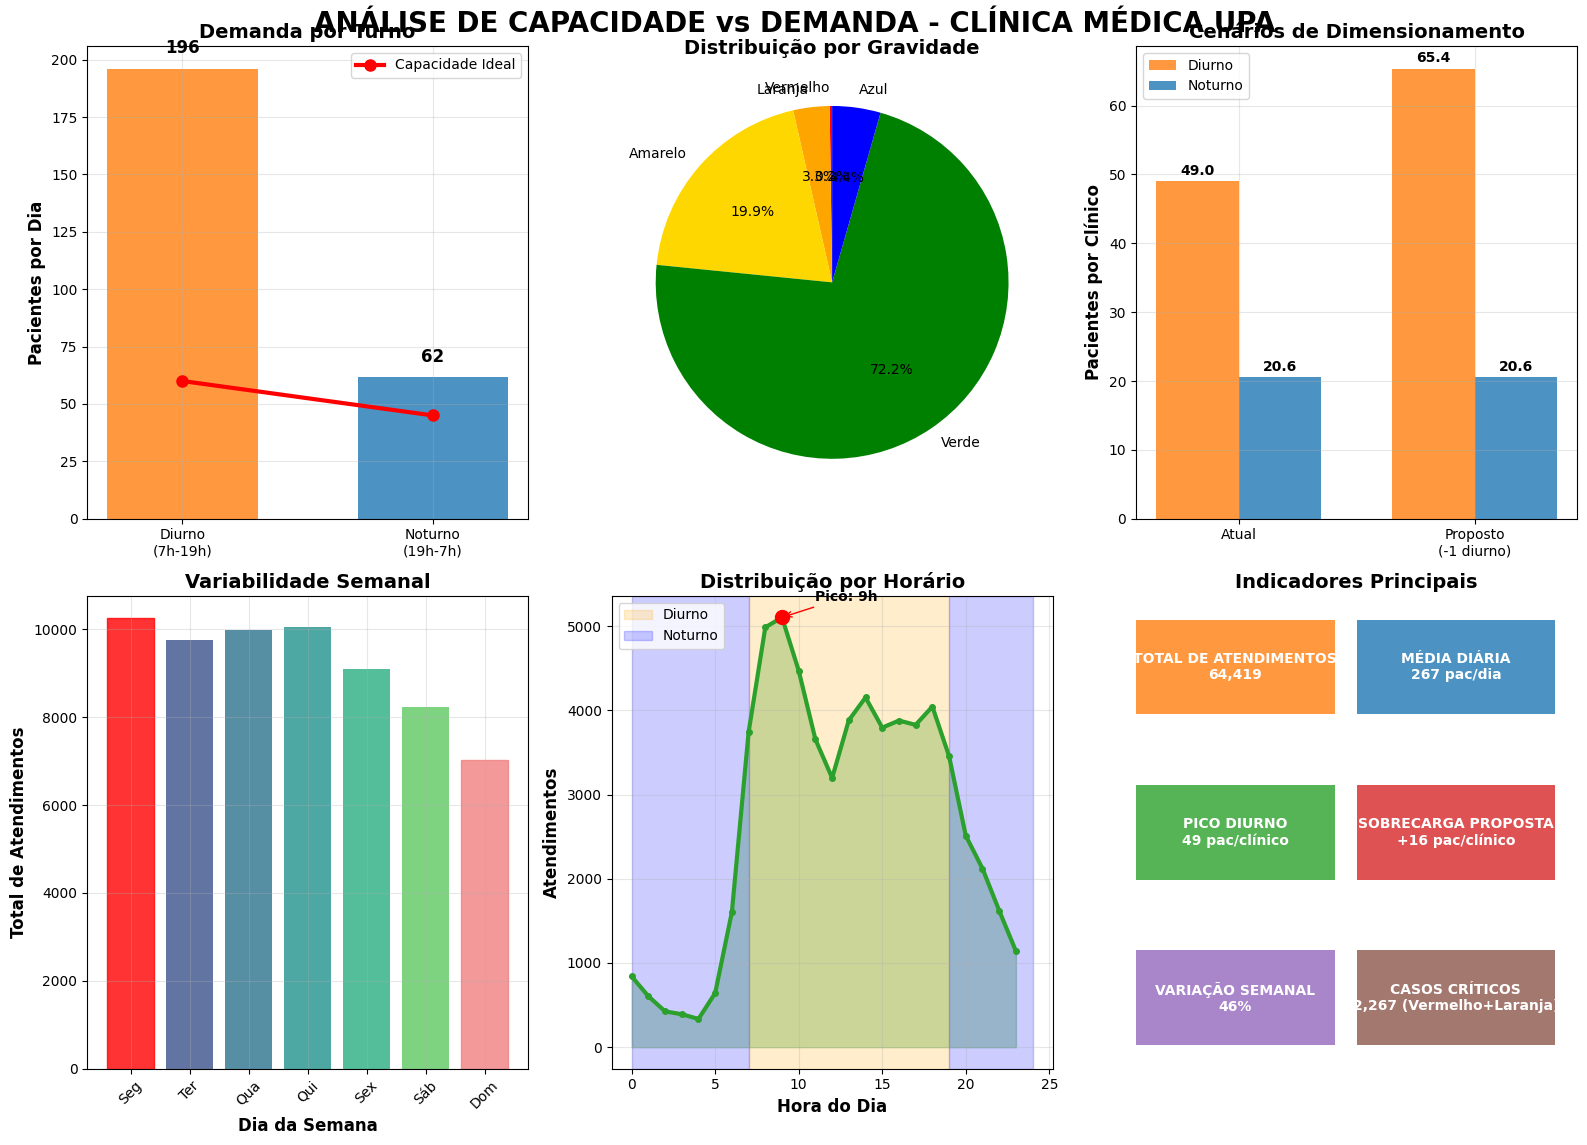

Dashboard executivo criado com 6 visualizações principais!


In [30]:
# GRÁFICOS EXECUTIVOS - Dashboard Profissional

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Configurar estilo profissional
plt.style.use('default')
sns.set_palette("Set2")

# Criar figura com múltiplos gráficos
fig = plt.figure(figsize=(16, 12))
fig.suptitle('ANÁLISE DE CAPACIDADE vs DEMANDA - CLÍNICA MÉDICA UPA', 
             fontsize=20, fontweight='bold', y=0.95)

# GRÁFICO 1: Demanda por Turno
ax1 = plt.subplot(2, 3, 1)
turnos = ['Diurno\n(7h-19h)', 'Noturno\n(19h-7h)']
demandas = [demanda_gerais_diurno, demanda_gerais_noturno]
capacidades = [clinicos_gerais_diurno * 15, clinicos_gerais_noturno * 15]  # assumindo 15 pac/clínico ideal

bars = ax1.bar(turnos, demandas, color=['#ff7f0e', '#1f77b4'], alpha=0.8, width=0.6)
ax1.plot(turnos, capacidades, color='red', marker='o', linewidth=3, markersize=8, label='Capacidade Ideal')

for i, v in enumerate(demandas):
    ax1.text(i, v + 5, f'{v:.0f}', ha='center', va='bottom', fontweight='bold', fontsize=12)

ax1.set_ylabel('Pacientes por Dia', fontsize=12, fontweight='bold')
ax1.set_title('Demanda por Turno', fontsize=14, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# GRÁFICO 2: Distribuição por Gravidade
ax2 = plt.subplot(2, 3, 2)
cores_manchester = ['red', 'orange', 'gold', 'green', 'blue']
gravidade_qtd = [
    (df_clinica_medica['vermelho'] == 'X').sum(),
    (df_clinica_medica['laranja'] == 'X').sum(),
    (df_clinica_medica['amarelo'] == 'X').sum(),
    (df_clinica_medica['verde'] == 'X').sum(),
    (df_clinica_medica['azul'] == 'X').sum()
]
labels_gravidade = ['Vermelho', 'Laranja', 'Amarelo', 'Verde', 'Azul']

wedges, texts, autotexts = ax2.pie(gravidade_qtd, labels=labels_gravidade, colors=cores_manchester, 
                                  autopct='%1.1f%%', startangle=90)
ax2.set_title('Distribuição por Gravidade', fontsize=14, fontweight='bold')

# GRÁFICO 3: Comparação de Cenários
ax3 = plt.subplot(2, 3, 3)
cenarios = ['Atual', 'Proposto\n(-1 diurno)']
carga_diurno_cenarios = [carga_diurno_atual, carga_diurno_nova]
carga_noturno_cenarios = [carga_noturno_atual, carga_noturno_nova]

x = np.arange(len(cenarios))
width = 0.35

bars1 = ax3.bar(x - width/2, carga_diurno_cenarios, width, label='Diurno', color='#ff7f0e', alpha=0.8)
bars2 = ax3.bar(x + width/2, carga_noturno_cenarios, width, label='Noturno', color='#1f77b4', alpha=0.8)

# Adicionar valores nas barras
for bar in bars1:
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{height:.1f}', ha='center', va='bottom', fontweight='bold')

for bar in bars2:
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{height:.1f}', ha='center', va='bottom', fontweight='bold')

ax3.set_ylabel('Pacientes por Clínico', fontsize=12, fontweight='bold')
ax3.set_title('Cenários de Dimensionamento', fontsize=14, fontweight='bold')
ax3.set_xticks(x)
ax3.set_xticklabels(cenarios)
ax3.legend()
ax3.grid(True, alpha=0.3)

# GRÁFICO 4: Demanda por Dia da Semana
ax4 = plt.subplot(2, 3, 4)
dias_ordem = ['Segunda-feira', 'Terça-feira', 'Quarta-feira', 'Quinta-feira', 'Sexta-feira', 'Sábado', 'Domingo']
atend_ordenado = atend_por_dia_ordenado.reindex(dias_ordem)

bars = ax4.bar(range(len(dias_ordem)), atend_ordenado.values, 
               color=sns.color_palette("viridis", len(dias_ordem)), alpha=0.8)

ax4.set_xlabel('Dia da Semana', fontsize=12, fontweight='bold')
ax4.set_ylabel('Total de Atendimentos', fontsize=12, fontweight='bold')
ax4.set_title('Variabilidade Semanal', fontsize=14, fontweight='bold')
ax4.set_xticks(range(len(dias_ordem)))
ax4.set_xticklabels([dia[:3] for dia in dias_ordem], rotation=45)
ax4.grid(True, alpha=0.3)

# Destacar maior e menor
max_idx = atend_ordenado.values.argmax()
min_idx = atend_ordenado.values.argmin()
bars[max_idx].set_color('red')
bars[min_idx].set_color('lightcoral')

# GRÁFICO 5: Distribuição Horária
ax5 = plt.subplot(2, 3, 5)
horas = list(range(24))
atend_horas = [atend_por_hora.get(h, 0) for h in horas]

ax5.plot(horas, atend_horas, linewidth=3, color='#2ca02c', marker='o', markersize=4)
ax5.fill_between(horas, atend_horas, alpha=0.3, color='#2ca02c')

# Destacar horário de pico
pico_idx = atend_horas.index(max(atend_horas))
ax5.scatter(pico_idx, max(atend_horas), color='red', s=100, zorder=5)
ax5.annotate(f'Pico: {pico_idx}h', xy=(pico_idx, max(atend_horas)), 
             xytext=(pico_idx+2, max(atend_horas)+200),
             arrowprops=dict(arrowstyle='->', color='red'),
             fontweight='bold')

# Marcar turnos
ax5.axvspan(7, 19, alpha=0.2, color='orange', label='Diurno')
ax5.axvspan(19, 24, alpha=0.2, color='blue', label='Noturno')
ax5.axvspan(0, 7, alpha=0.2, color='blue')

ax5.set_xlabel('Hora do Dia', fontsize=12, fontweight='bold')
ax5.set_ylabel('Atendimentos', fontsize=12, fontweight='bold')
ax5.set_title('Distribuição por Horário', fontsize=14, fontweight='bold')
ax5.legend()
ax5.grid(True, alpha=0.3)

# GRÁFICO 6: Indicadores Chave
ax6 = plt.subplot(2, 3, 6)
ax6.axis('off')

# Criar caixas de texto com métricas principais
metrics = [
    f"TOTAL DE ATENDIMENTOS\n{len(df_clinica_medica):,}",
    f"MÉDIA DIÁRIA\n{media_clinica_dia:.0f} pac/dia",
    f"PICO DIURNO\n{demanda_gerais_diurno/clinicos_gerais_diurno:.0f} pac/clínico",
    f"SOBRECARGA PROPOSTA\n+{aumento_carga:.0f} pac/clínico",
    f"VARIAÇÃO SEMANAL\n{variacao:.0f}%",
    f"CASOS CRÍTICOS\n{len(casos_criticos):,} (Vermelho+Laranja)"
]

colors = ['#ff7f0e', '#1f77b4', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

for i, (metric, color) in enumerate(zip(metrics, colors)):
    row = i // 2
    col = i % 2
    
    rect = plt.Rectangle((col*0.5, 1-row*0.35-0.25), 0.45, 0.2, 
                        facecolor=color, alpha=0.8, transform=ax6.transAxes)
    ax6.add_patch(rect)
    
    ax6.text(col*0.5+0.225, 1-row*0.35-0.15, metric, 
             transform=ax6.transAxes, ha='center', va='center',
             fontsize=10, fontweight='bold', color='white')

ax6.set_title('Indicadores Principais', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

print("Dashboard executivo criado com 6 visualizações principais!")

In [31]:
# GRÁFICO INDIVIDUAL - Cenários de Dimensionamento (para apresentação)

plt.figure(figsize=(12, 8))

# Dados para o gráfico
cenarios = ['Cenário Atual\n(4 diurno + 3 noturno)', 'Cenário Proposto\n(3 diurno + 3 noturno)']
carga_diurno_cenarios = [carga_diurno_atual, carga_diurno_nova]
carga_noturno_cenarios = [carga_noturno_atual, carga_noturno_nova]

x = np.arange(len(cenarios))
width = 0.35

# Criar gráfico de barras
fig, ax = plt.subplots(figsize=(12, 8))

bars1 = ax.bar(x - width/2, carga_diurno_cenarios, width, 
               label='Turno Diurno (7h-19h)', color='#FF6B35', alpha=0.8, edgecolor='black')
bars2 = ax.bar(x + width/2, carga_noturno_cenarios, width, 
               label='Turno Noturno (19h-7h)', color='#004E89', alpha=0.8, edgecolor='black')

# Adicionar linha de limite recomendado
limite_recomendado = 40  # exemplo de limite ideal
ax.axhline(y=limite_recomendado, color='red', linestyle='--', linewidth=2, 
           label='Limite Recomendado (40 pac/clínico)')

# Adicionar valores nas barras
for i, bar in enumerate(bars1):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 1,
             f'{height:.1f}\npac/clínico', ha='center', va='bottom', 
             fontweight='bold', fontsize=12)

for i, bar in enumerate(bars2):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 1,
             f'{height:.1f}\npac/clínico', ha='center', va='bottom', 
             fontweight='bold', fontsize=12)

# Personalização
ax.set_ylabel('Pacientes por Clínico por Turno', fontsize=14, fontweight='bold')
ax.set_xlabel('Cenários de Dimensionamento', fontsize=14, fontweight='bold')
ax.set_title('IMPACTO DA REDUÇÃO DE 1 CLÍNICO NO TURNO DIURNO', 
             fontsize=16, fontweight='bold', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(cenarios, fontsize=12)
ax.legend(fontsize=12, loc='upper left')
ax.grid(True, alpha=0.3, axis='y')

# Adicionar anotações de impacto
ax.annotate(f'Aumento de {aumento_carga:.1f} pacientes\n(+{percentual_aumento:.0f}%)', 
            xy=(1-width/2, carga_diurno_nova), xytext=(1.2, carga_diurno_nova + 10),
            arrowprops=dict(arrowstyle='->', color='bluE', lw3),
            fontsize=11, fontweight='bold', color='red',
            bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7))

plt.tight_layout()
plt.show()

# Salvar gráfico em alta resolução
plt.savefig('cenarios_dimensionamento.png', dpi=300, bbox_inches='tight')
print("Gráfico individual salvo como: cenarios_dimensionamento.png")

SyntaxError: positional argument follows keyword argument (47442531.py, line 52)

In [ ]:
# TABELAS DINÂMICAS EXECUTIVAS PARA CSV

print("CRIANDO TABELAS DINÂMICAS EXECUTIVAS...")

# TABELA 1: Resumo Executivo Principal
resumo_executivo = pd.DataFrame({
    'INDICADOR': [
        'Total de Atendimentos (Jan-Ago 2025)',
        'Clínica Médica (excluindo especialidades)',
        'Média de Atendimentos por Dia',
        'Demanda Turno Diurno (7h-19h)',
        'Demanda Turno Noturno (19h-7h)',
        'Proporção Diurno vs Total',
        'Proporção Noturno vs Total',
        'Casos Críticos (Vermelho + Laranja)',
        'Casos Gerais (Amarelo + Verde + Azul)',
        'Profissionais Atuais - Diurno',
        'Profissionais Atuais - Noturno',
        'Carga Atual por Clínico - Diurno',
        'Carga Atual por Clínico - Noturno'
    ],
    'VALOR': [
        f'{len(df_clinica_medica):,}',
        f'{len(df_clinica_medica)/len(df_filtrado)*100:.1f}%',
        f'{media_clinica_dia:.1f} pacientes',
        f'{demanda_gerais_diurno:.1f} pacientes/dia',
        f'{demanda_gerais_noturno:.1f} pacientes/dia',
        f'{len(casos_gerais[casos_gerais["turno"] == "Diurno"])/len(casos_gerais)*100:.1f}%',
        f'{len(casos_gerais[casos_gerais["turno"] == "Noturno"])/len(casos_gerais)*100:.1f}%',
        f'{len(casos_criticos):,}',
        f'{len(casos_gerais):,}',
        f'{clinicos_gerais_diurno} médicos',
        f'{clinicos_gerais_noturno} médicos',
        f'{carga_diurno_atual:.1f} pac/clínico/turno',
        f'{carga_noturno_atual:.1f} pac/clínico/turno'
    ],
    'OBSERVAÇÃO': [
        'Dados de 8 meses de 2025',
        'Foco da análise',
        'Baseado em 241 dias analisados',
        'Período de maior movimento',
        'Período de menor movimento',
        'Concentração no diurno',
        'Menor volume noturno',
        'Atendidos por 1 médico emergência',
        'Atendidos por clínicos gerais',
        'Excluindo 1 da emergência',
        'Excluindo 1 da emergência',
        'Carga atual elevada',
        'Carga atual adequada'
    ]
})

resumo_executivo.to_csv('01_resumo_executivo.csv', index=False, encoding='utf-8')
print("✓ Tabela criada: 01_resumo_executivo.csv")

# TABELA 2: Análise por Gravidade
analise_gravidade = pd.DataFrame({
    'COR_MANCHESTER': ['Vermelho', 'Laranja', 'Amarelo', 'Verde', 'Azul', 'Sem Classificação'],
    'PRIORIDADE': ['Emergência', 'Urgente', 'Pouco Urgente', 'Não Urgente', 'Não Urgente', 'A Classificar'],
    'TEMPO_RECOMENDADO': ['Imediato', '10 min', '60 min', '120 min', '240 min', 'Variável'],
    'QUANTIDADE': [
        (df_clinica_medica['vermelho'] == 'X').sum(),
        (df_clinica_medica['laranja'] == 'X').sum(),
        (df_clinica_medica['amarelo'] == 'X').sum(),
        (df_clinica_medica['verde'] == 'X').sum(),
        (df_clinica_medica['azul'] == 'X').sum(),
        len(sem_classificacao)
    ],
    'PERCENTUAL': [
        f'{(df_clinica_medica["vermelho"] == "X").sum()/len(df_clinica_medica)*100:.1f}%',
        f'{(df_clinica_medica["laranja"] == "X").sum()/len(df_clinica_medica)*100:.1f}%',
        f'{(df_clinica_medica["amarelo"] == "X").sum()/len(df_clinica_medica)*100:.1f}%',
        f'{(df_clinica_medica["verde"] == "X").sum()/len(df_clinica_medica)*100:.1f}%',
        f'{(df_clinica_medica["azul"] == "X").sum()/len(df_clinica_medica)*100:.1f}%',
        f'{len(sem_classificacao)/len(df_clinica_medica)*100:.1f}%'
    ],
    'MEDIA_DIA': [
        f'{(df_clinica_medica["vermelho"] == "X").sum()/dias_periodo:.1f}',
        f'{(df_clinica_medica["laranja"] == "X").sum()/dias_periodo:.1f}',
        f'{(df_clinica_medica["amarelo"] == "X").sum()/dias_periodo:.1f}',
        f'{(df_clinica_medica["verde"] == "X").sum()/dias_periodo:.1f}',
        f'{(df_clinica_medica["azul"] == "X").sum()/dias_periodo:.1f}',
        f'{len(sem_classificacao)/dias_periodo:.1f}'
    ]
})

analise_gravidade.to_csv('02_analise_por_gravidade.csv', index=False, encoding='utf-8')
print("✓ Tabela criada: 02_analise_por_gravidade.csv")

# TABELA 3: Comparação de Cenários
comparacao_cenarios = pd.DataFrame({
    'CENÁRIO': ['Atual', 'Proposto (Redução)'],
    'CLÍNICOS_DIURNO': [clinicos_gerais_diurno, clinicos_diurno_novo],
    'CLÍNICOS_NOTURNO': [clinicos_gerais_noturno, clinicos_gerais_noturno],
    'DEMANDA_DIURNO': [f'{demanda_gerais_diurno:.1f}', f'{demanda_gerais_diurno:.1f}'],
    'DEMANDA_NOTURNO': [f'{demanda_gerais_noturno:.1f}', f'{demanda_gerais_noturno:.1f}'],
    'CARGA_DIURNO_PAC_CLINICO': [f'{carga_diurno_atual:.1f}', f'{carga_diurno_nova:.1f}'],
    'CARGA_NOTURNO_PAC_CLINICO': [f'{carga_noturno_atual:.1f}', f'{carga_noturno_nova:.1f}'],
    'DIFERENÇA_ENTRE_TURNOS': [f'{abs(carga_diurno_atual - carga_noturno_atual):.1f}', 
                               f'{abs(carga_diurno_nova - carga_noturno_nova):.1f}'],
    'IMPACTO_DIURNO': ['Baseline', f'+{aumento_carga:.1f} pac (+{percentual_aumento:.1f}%)'],
    'AVALIAÇÃO': ['Desbalanceado mas funcional', 'Sobrecarga crítica no diurno']
})

comparacao_cenarios.to_csv('03_comparacao_cenarios.csv', index=False, encoding='utf-8')
print("✓ Tabela criada: 03_comparacao_cenarios.csv")

print(f"\nARQUIVOS CSV CRIADOS PARA APRESENTAÇÃO:")
print("="*50)
print("01_resumo_executivo.csv - KPIs principais")
print("02_analise_por_gravidade.csv - Distribuição Manchester") 
print("03_comparacao_cenarios.csv - Cenário atual vs proposto")
print("\nTodos os arquivos estão formatados como tabelas dinâmicas!")
print("Podem ser abertos diretamente no Excel/Google Sheets")

In [ ]:
# TABELAS DINÂMICAS FOCADAS - APENAS O QUE CONSOLIDAMOS

print("CRIANDO TABELAS COM DADOS CONSOLIDADOS...")

# TABELA 1: Resumo Consolidado
resumo_consolidado = pd.DataFrame({
    'INDICADOR': [
        'Total de Atendimentos (Jan-Ago 2025)',
        'Clínica Médica (excluindo especialidades)',
        'Casos Gerais (excluindo Vermelho + Laranja)',
        'Demanda Diurno (7h-19h)',
        'Demanda Noturno (19h-7h)',
        'Clínicos Gerais Diurno (Atual)',
        'Clínicos Gerais Noturno (Atual)',
        'Carga por Clínico Diurno (Atual)',
        'Carga por Clínico Noturno (Atual)'
    ],
    'VALOR': [
        f'{len(df_filtrado):,}',
        f'{len(df_clinica_medica):,}',
        f'{len(casos_gerais):,}',
        f'{demanda_gerais_diurno:.1f} pacientes/dia',
        f'{demanda_gerais_noturno:.1f} pacientes/dia',
        f'{clinicos_gerais_diurno} médicos',
        f'{clinicos_gerais_noturno} médicos',
        f'{carga_diurno_atual:.1f} pac/clínico/turno',
        f'{carga_noturno_atual:.1f} pac/clínico/turno'
    ]
})

resumo_consolidado.to_csv('RESUMO_CONSOLIDADO.csv', index=False, encoding='utf-8')
print("✓ Tabela criada: RESUMO_CONSOLIDADO.csv")

# TABELA 2: Comparação de Cenários (Exatamente como calculamos)
cenarios_consolidados = pd.DataFrame({
    'CENARIO': [
        'Atual (4 diurno + 3 noturno)',
        'Proposto (3 diurno + 3 noturno)'
    ],
    'CLINICOS_DIURNO_7h_19h': [4, 3],
    'CLINICOS_NOTURNO_19h_7h': [3, 3],
    'DEMANDA_DIURNO': [f'{demanda_gerais_diurno:.1f}', f'{demanda_gerais_diurno:.1f}'],
    'DEMANDA_NOTURNO': [f'{demanda_gerais_noturno:.1f}', f'{demanda_gerais_noturno:.1f}'],
    'CARGA_PAC_CLINICO_DIURNO': [f'{carga_diurno_atual:.1f}', f'{carga_diurno_nova:.1f}'],
    'CARGA_PAC_CLINICO_NOTURNO': [f'{carga_noturno_atual:.1f}', f'{carga_noturno_nova:.1f}'],
    'AUMENTO_CARGA_DIURNO': ['0.0', f'+{aumento_carga:.1f}'],
    'AUMENTO_PERCENTUAL_DIURNO': ['0.0%', f'+{percentual_aumento:.1f}%']
})

cenarios_consolidados.to_csv('CENARIOS_CONSOLIDADOS.csv', index=False, encoding='utf-8')
print("✓ Tabela criada: CENARIOS_CONSOLIDADOS.csv")

# TABELA 3: Distribuição por Turnos (Dados base)
turnos_consolidados = pd.DataFrame({
    'TURNO': ['Diurno (7h-19h)', 'Noturno (19h-7h)', 'TOTAL'],
    'ATENDIMENTOS_CASOS_GERAIS': [
        len(casos_gerais[casos_gerais['turno'] == 'Diurno']),
        len(casos_gerais[casos_gerais['turno'] == 'Noturno']),
        len(casos_gerais)
    ],
    'PERCENTUAL': [
        f'{len(casos_gerais[casos_gerais["turno"] == "Diurno"])/len(casos_gerais)*100:.1f}%',
        f'{len(casos_gerais[casos_gerais["turno"] == "Noturno"])/len(casos_gerais)*100:.1f}%',
        '100.0%'
    ],
    'MEDIA_PACIENTES_DIA': [
        f'{demanda_gerais_diurno:.1f}',
        f'{demanda_gerais_noturno:.1f}',
        f'{demanda_gerais_diurno + demanda_gerais_noturno:.1f}'
    ]
})

turnos_consolidados.to_csv('TURNOS_CONSOLIDADOS.csv', index=False, encoding='utf-8')
print("✓ Tabela criada: TURNOS_CONSOLIDADOS.csv")

print(f"\n📋 3 TABELAS FOCADAS CRIADAS:")
print("="*40)
print("RESUMO_CONSOLIDADO.csv")
print("CENARIOS_CONSOLIDADOS.csv") 
print("TURNOS_CONSOLIDADOS.csv")
print("\nApenas os dados que já consolidamos na análise!")
print("Prontas para apresentar ao chefe!")